# Case-Control Finder  
## Finds cases and controls for a given condition within the Sequence Read Archive

__Import dependencies and load data__

In [1]:
%load_ext rpy2.ipython

In [2]:
%%bash
wget https://cran.r-project.org/src/contrib/rjson_0.2.20.tar.gz
R CMD INSTALL rjson_0.2.20.tar.gz

x86_64-conda_cos6-linux-gnu-c++  -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -pipe -I/opt/conda/include -fdebug-prefix-map==/usr/local/src/conda/- -fdebug-prefix-map==/usr/local/src/conda-prefix  -c dump.cpp -o dump.o
x86_64-conda_cos6-linux-gnu-cc -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -pipe -I/opt/conda/include -fdebug-prefix-map==/usr/local/src/conda/- -fdebug-prefix-map==/usr/local/src/conda-prefix  -c parser.c -o parser.o
x86_64-conda_cos6-linux-gnu-cc -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib 

--2019-05-23 17:13:32--  https://cran.r-project.org/src/contrib/rjson_0.2.20.tar.gz
Resolving cran.r-project.org (cran.r-project.org)... 137.208.57.37
Connecting to cran.r-project.org (cran.r-project.org)|137.208.57.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99600 (97K) [application/x-gzip]
Saving to: ‘rjson_0.2.20.tar.gz.81’

     0K .......... .......... .......... .......... .......... 51%  179K 0s
    50K .......... .......... .......... .......... .......   100% 4.13M=0.3s

2019-05-23 17:13:33 (335 KB/s) - ‘rjson_0.2.20.tar.gz.81’ saved [99600/99600]

* installing to library ‘/opt/conda/lib/R/library’
* installing *source* package ‘rjson’ ...
** package ‘rjson’ successfully unpacked and MD5 sums checked
** libs
installing to /opt/conda/lib/R/library/rjson/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can 

In [3]:
%%R
library(rjson)

In [4]:
import json
import pandas as pd
from functions import *
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

experiment_to_terms_f_json = './data/experiment_to_terms.json'
term_name_to_id_f = './data/term_name_to_id.json'
experiments_in_hackathon_data_f = './data/experiments_in_hackathon_data.json'
experiment_to_type_f = './data/experiment_to_type.json'
experiment_to_study_f = './data/experiment_to_study.json'
experiment_to_real_value_terms_f = './data/experiment_to_real_value_terms.json'
experiment_to_runs_f = './data/experiment_to_runs.json'

with open(experiment_to_terms_f_json, 'r') as f:
    sample_to_terms = json.load(f)    
with open(term_name_to_id_f, 'r') as f:
    term_name_to_id = json.load(f)
with open(experiments_in_hackathon_data_f, 'r') as f:
    available = set(json.load(f))
with open(experiment_to_type_f, 'r') as f:
    sample_to_type = json.load(f)
with open(experiment_to_study_f, 'r') as f:
    sample_to_study = json.load(f)
with open(experiment_to_real_value_terms_f, 'r') as f:
    sample_to_real_val = json.load(f)
with open(experiment_to_runs_f, 'r') as f:
    sample_to_runs = json.load(f)
    
filter_available = False
if filter_available:
    sample_to_terms = {
        k:v for k,v in sample_to_terms.items()  
        if k in available
    }

In [5]:
%%R
metadata_file_tsv <- read.table(file = "./data/experiment_to_terms.tsv", header = FALSE, sep = "\t")

__1. Type in the term you are looking for (in place of `'glioblastoma multiforme'`)__

In [6]:
term = 'systemic lupus erythematosus' ## <-- INPUT HERE

__2. List terms below to remove from control set__  


In the example below, `'disease', 'disease of cellular proliferation'` will be removed from the controls

In [7]:
blacklist_terms = set([
    'disease', 
    'disease of cellular proliferation'
]) ## <-- INPUT HERE

__3. Create case and controls__

In [8]:
case, control = term_to_run(sample_to_terms, term)
ret = match_case_to_controls(term, control, case, sample_to_terms,
    sample_to_study, blacklist_terms, term_name_to_id, sample_to_type,
    filter_poor=True, filter_cell_line=True, filter_differentiated=True,
    sample_to_runs=sample_to_runs, by_run=False)
df = ret[0]
control_confound = ret[1]
case_confound = ret[2]
tissue_intersections = ret[3]

Here's a summary of the results:

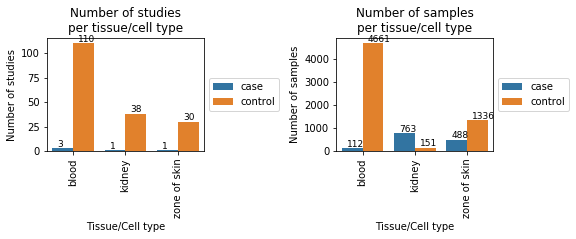

In [9]:
create_summary_plots(df)
plt.show()

__4. Browse other metadata terms that are associated with cases and controls__

Enter whether you want to view cases or controls. Assign the following variable to `True` to view cases or `False` to view controls:

In [10]:
view_cases = False ## <-- INPUT HERE

Enter the tissue or cell type on which to subset your samples:

In [11]:
term = 'kidney' ## <-- INPUT HERE

if view_cases:
    condition = 'case'
else:
    condition = 'control'
view_exps = select_case_control_experiment_set(df, condition, term)
with open('./data/term-in.json', 'w') as f:
    json.dump(view_exps, f)

The following plots the proportion of metadata terms for those terms that appear in at least 10% of the samples in the current subset:

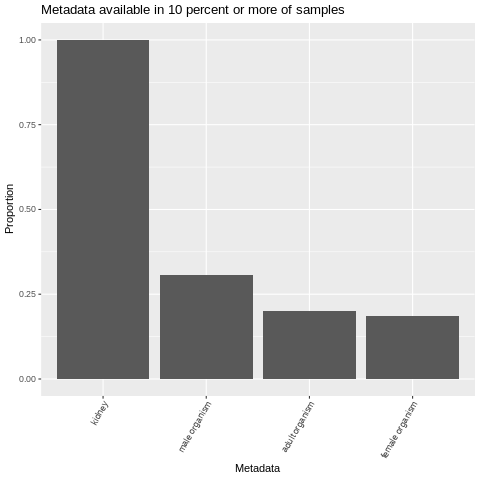

In [12]:
%%R
source("./Metadata_plot.R")
bp

In [13]:
%%R
source("./Metadata_table.R")
query_disease_metadata_top10_table

         Metadata Sample Number Proportion
1          kidney            75  1.0000000
2   male organism            23  0.3066667
3  adult organism            15  0.2000000
4 female organism            14  0.1866667


         Var1 Freq  Metadata Proportion
632 cell line    0 cell line          0


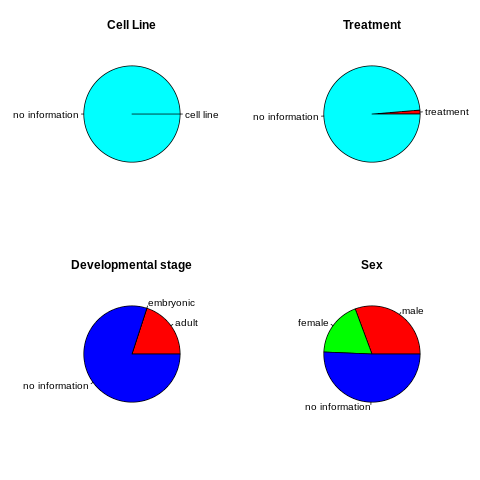

In [14]:
%%R
source("./Metadata_piecharts.R")
query_cell_line

__5. Create output file__

Enter the filename for which you would like to output these cases or controls:

In [15]:
output_file = 'cases_vs_controls.csv' ## <- OUTPUT FILE HERE

df.to_csv(output_file)